Цветков Никита ПИ18-3 Вариант 1 Датасет https://www.kaggle.com/vbmokin/ammonium-prediction-in-river-water

Импорт библиотек

In [45]:
import pandas as pd
import time
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import xgboost as xgb


from sklearn.metrics import r2_score, mean_squared_error as mse
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

Передо мной стоит задача регрессии. Следовательно модели использовать буду регрессионые

Загружаю данные

This dataset has data on the Ammonium ions concentration in river water.

In [11]:
df = pd.read_csv('train.csv')
df.shape

(147, 9)

Обзор нескольких строчек датасета

In [12]:
df.head()

,Id,target,1,2,3,4,5,6,7
0,0,1.10,0.69,1.04,NaN,NaN,NaN,NaN,NaN
1,3,0.41,0.71,0.72,NaN,NaN,NaN,NaN,NaN
2,4,1.70,2.21,2.21,NaN,NaN,NaN,NaN,NaN
3,5,0.62,0.60,0.68,NaN,NaN,NaN,NaN,NaN
4,6,0.60,0.60,0.90,NaN,NaN,NaN,NaN,NaN


Описание численных данных датасета

In [13]:
df.describe()

,Id,target,1,2,3,4,5,6,7
count,147.000000,147.000000,145.000000,145.000000,32.000000,31.000000,33.000000,37.000000,37.000000
mean,101.401361,0.578095,0.588000,0.660690,1.233750,5.132258,8.277273,0.660270,0.736216
std,64.836640,0.433388,0.462156,0.591936,1.111241,4.962224,7.304592,0.539462,0.602930
min,0.000000,0.040000,0.040000,0.020000,0.110000,0.280000,1.250000,0.010000,0.050000
25%,41.500000,0.250000,0.230000,0.220000,0.550000,2.080000,3.750000,0.310000,0.340000
50%,102.000000,0.410000,0.420000,0.440000,0.855000,3.850000,5.300000,0.510000,0.530000
75%,158.500000,0.835000,0.800000,0.910000,1.470000,5.710000,12.180000,1.030000,0.980000
max,214.000000,1.930000,2.400000,3.600000,4.280000,21.970000,30.260000,2.680000,3.230000


Подсчет пропущенных значений

In [14]:
df.isna().sum()

Id          0
target      0
1           2
2           2
3         115
4         116
5         114
6         110
7         110
dtype: int64

Просмотр информации по датасету, о типах переменных в строках

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      147 non-null    int64  
 1   target  147 non-null    float64
 2   1       145 non-null    float64
 3   2       145 non-null    float64
 4   3       32 non-null     float64
 5   4       31 non-null     float64
 6   5       33 non-null     float64
 7   6       37 non-null     float64
 8   7       37 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 10.5 KB


Строю хитмап корреляции столбцов данных

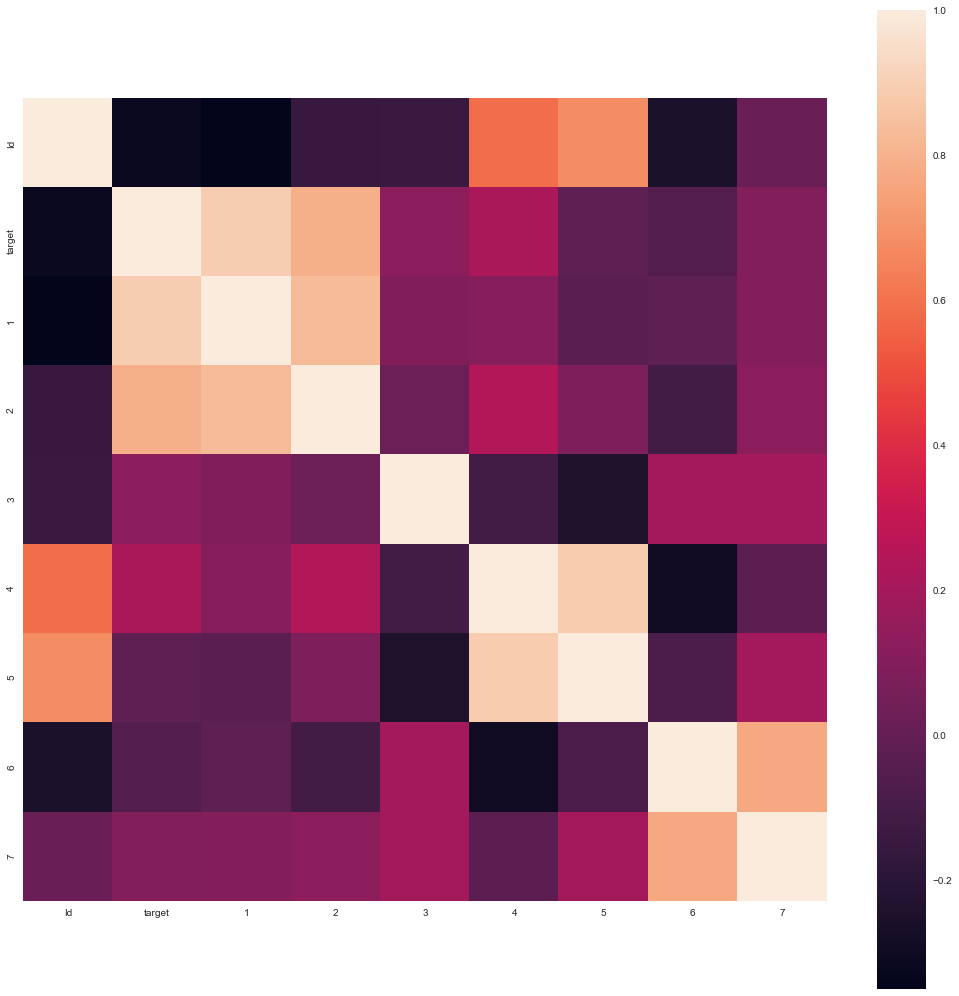

In [16]:
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, square=True)
plt.show()

Слишком много пропущенных значений в колонках 3-7, принимаю решение их удалить.

In [17]:
df.drop(df[['3','4','5','6','7']], axis=1, inplace=True)
df.head()

,Id,target,1,2
0,0,1.10,0.69,1.04
1,3,0.41,0.71,0.72
2,4,1.70,2.21,2.21
3,5,0.62,0.60,0.68
4,6,0.60,0.60,0.90


In [18]:
df.count()

Id        147
target    147
1         145
2         145
dtype: int64

Удаляю пропущенные значения

In [19]:
df.dropna(inplace=True)
df.count()

Id        144
target    144
1         144
2         144
dtype: int64

Text(0.5, 1.0, 'Концентрация аммония')

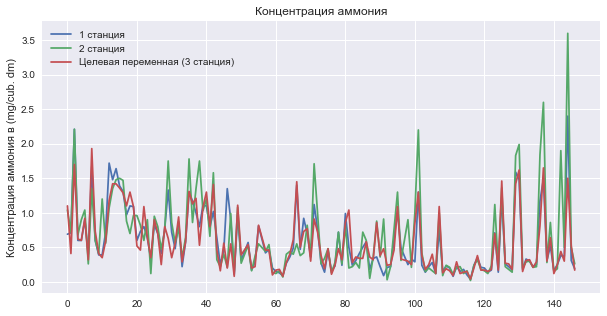

In [59]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['1'],  label='1 станция')
plt.plot(df.index, df['2'], label='2 станция')
plt.plot(df.index, df['target'], label='Целевая переменная (3 станция)')
plt.legend()

plt.ylabel('Концентрация аммония в (mg/cub. dm)')
plt.title('Концентрация аммония')

Разбиваю датасет при помощи метода train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Id', 'target'], axis=1), df['target'], test_size=0.33)

Обучаю линейную обычную модель линейной регрессии

In [28]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Делаю предикт обученной моделью

In [30]:
y_pred_train=linreg.predict(X_train)

Вывожу метрики качества

In [33]:
print(np.sqrt(mse(y_train, y_pred_train)), ' Средняя квадратичная ошибка')
print(r2_score(y_train, y_pred_train), ' Р-квадрат')

0.1724069305193898  Средняя квадратичная ошибка
0.8127243453000901  Р-квадрат


Теперь обучу на данных, которые модель не видела ни в трейне, ни в тесте- на Кэггл был отдельный датасет "для теста"

In [38]:
df_test=pd.read_csv('test.csv')
df_test.head()

,Id,1,2,3,4,5,6,7
0,1,0.63,0.60,NaN,NaN,NaN,NaN,NaN
1,2,1.50,0.87,NaN,NaN,NaN,NaN,NaN
2,32,0.32,0.54,NaN,NaN,NaN,NaN,NaN
3,40,1.38,1.63,NaN,NaN,NaN,NaN,NaN
4,43,1.72,1.68,NaN,NaN,NaN,NaN,NaN


Проведу ту же очистку данных, что и для трейнового датасета

In [41]:
df_test.drop(df_test[['Id','3','4','5','6','7']], axis=1, inplace=True)
df_test.dropna(inplace=True)
df_test.head()

,1,2
0,0.63,0.60
1,1.50,0.87
2,0.32,0.54
3,1.38,1.63
4,1.72,1.68


В тестовом нет целевой переменной, поэтому просто делаю предикт и выведу результат.

In [42]:
y_pred_train=linreg.predict(df_test)

In [44]:
print(y_pred_train)

[0.58231512 1.11839706 0.40200657 1.28025994 1.47334253 1.03395133
 0.46614815 0.15192604 0.47542165 0.15488381 0.41949552 0.28235281
 0.62452424 0.31233066 0.56604055 0.27952386 0.40187775 0.26903599
 1.35220301 0.54950833 0.44947337 0.43804252 0.87178957 0.21323868
 0.34473725 0.37498648 0.33424938 0.22735591 0.38547435 0.29458407
 0.25949111 0.24470229 0.27885227 0.3216179  0.44691581 0.37995903
 0.26460622 0.64294242 0.45323155 0.35791149 0.80493413 0.29955662
 0.15811296 0.25881951 0.16994402 0.17585954 0.23555761 0.16537168
 0.51387259 0.14896828 0.23421442 0.27279417 0.15299784 0.2683644
 0.19683528 0.2198258  0.24766005 0.32711948 0.34540884 0.3736433
 0.36208363 0.38748914 0.34675203]


Обучу еще парочку моделек для сравнения результата

In [46]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train,y_train)
y_pred_train=rfreg.predict(X_train)

In [47]:
print(np.sqrt(mse(y_train, y_pred_train)), ' Средняя квадратичная ошибка')
print(r2_score(y_train, y_pred_train), ' Р-квадрат')

0.0704666329972972  Средняя квадратичная ошибка
0.9687148007161074  Р-квадрат


Случайный лес деревьев показал себя значительно лучше линейной регрессии, но стоит попытаться улучшить еще. Для этого использую ансабль деревьев с бустом.

In [54]:
booster = xgb.XGBRegressor()
booster.fit(X_train, y_train)
y_pred_train = booster.predict(X_train)

In [55]:
print(np.sqrt(mse(y_train, y_pred_train)), ' Средняя квадратичная ошибка')
print(r2_score(y_train, y_pred_train), ' Р-квадрат')

0.01059534926221259  Средняя квадратичная ошибка
0.9992927019858273  Р-квадрат


Да, действительно, лучше всех моделей себя показал Xgboost, так что буду считать его лучшей моделью.

Посмотрим эффективность буста на тестовой подвыборке из трейнового датасета.

In [56]:
y_pred_test = booster.predict(X_test)
print(np.sqrt(mse(y_test, y_pred_test)), ' Средняя квадратичная ошибка')
print(r2_score(y_test, y_pred_test), ' Р-квадрат')

0.24322829979786642  Средняя квадратичная ошибка
0.7522079131597829  Р-квадрат


Результаты ожидаемо упали, но это нормально, так как эти данные модель не видела, и что ожидаемо, переобучилась на трейновом подмножестве в связи с тем, что модель использовал с дефолтными параметрами, не ограничивая максимальную глубину и степень обучения.

И, наконец, делаю предикт по исходному тестовому датасету с Кэггла и вывожу полученный список.

In [57]:
y_pred_test=booster.predict(df_test)
print(y_pred_test)

[0.77112615 1.1526153  0.40208575 1.1835778  1.1714734  1.1715114
 0.6076766  0.08401966 0.46117628 0.08401966 0.3069859  0.34079814
 0.5906111  0.32352978 0.48064855 0.30427456 0.30350208 0.31908095
 1.5260273  0.5819579  0.47330123 0.2856577  0.89935875 0.1582393
 0.33005437 0.31953225 0.33126396 0.16142192 0.31874743 0.380513
 0.27179036 0.27427304 0.2891766  0.37609005 0.2961797  0.3993612
 0.3463487  0.96840847 0.3756256  0.30495262 0.90055025 0.32600337
 0.15952423 0.25323844 0.16654721 0.16654721 0.17433637 0.08144361
 0.46695867 0.08401966 0.25493586 0.45322612 0.11663133 0.26035005
 0.11032978 0.17780218 0.27427304 0.3277023  0.32136762 0.30295825
 0.36259273 0.4090302  0.30495262]


# Вывод

Я выгрузил датасет, провел небольшой предварительный анализ, удалил выбросы и лишние колонки, посмотрел на распределение данных в датасете, разбил на тестовое и трейновое подмножества, обучил несколько моделей, выбрал из них лучшую и сделал предикт по тестовому датасету с кэгла.